In [6]:
import pandas as pd
import tiktoken
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import preprocessing as pp 
from collections import Counter

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nicolas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/nicolas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/nicolas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
DATA_PATH = '../../data/'
filename = 'english_cleaned_lyrics.csv'

In [35]:
df = pd.read_csv(DATA_PATH + filename)
df

,Unnamed: 0,index,song,year,artist,genre,lyrics
0,0,0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing You know I'm gonna cut r...
1,1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...
2,2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...
3,3,3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I If I wrote a book about ...
4,4,4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party it's pop...
...,...,...,...,...,...,...,...
218205,362232,362232,who-am-i-drinking-tonight,2012,edens-edge,Country,I gotta say Boy after only just a couple of da...
218206,362233,362233,liar,2012,edens-edge,Country,I helped you find her diamond ring You made me...
218207,362234,362234,last-supper,2012,edens-edge,Country,Look at the couple in the corner booth Looks a...
218208,362235,362235,christ-alone-live-in-studio,2012,edens-edge,Country,When I fly off this mortal earth And I'm measu...


In [36]:
print('   -------------------')
print("Number of artists:", len(df['artist'].unique()))
print('   -------------------')
print("Genres:", df['genre'].unique())
print('   -------------------')
years = df['year'].unique()
years.sort()
print("years:", years)
print('   -------------------')

   -------------------
Number of artists: 10431
   -------------------
Genres: ['Pop' 'Hip-Hop' 'Rock' 'Metal' 'Other' 'Country' 'Jazz' 'Electronic'
 'Folk' 'R&B' 'Indie']
   -------------------
years: [  67  112  702 1968 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979
 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016]
   -------------------


In [43]:
df = df[~(df['genre'] == 'Other')]
df[(df['year'] == 67) | (df['year'] == 112) | (df['year'] == 702)]
#remove incorrect years
df = df[~(df['year'] == 67) & ~(df['year'] == 112) & ~(df['year'] == 702)]

# Testing different tokenizer

## Testing byte pair encoding with tiktoken

In [7]:
lyric = df['lyrics'][0]
preprocessed_lyric = lyric.lower()
preprocessed_lyric = ''.join(char for char in lyric if char not in string.punctuation)

stop_words = set(stopwords.words('english'))
filtered_lyric = [word for word in preprocessed_lyric.split() if word not in stop_words]
preprocessed_lyric = ' '.join(filtered_lyric)
print(f"lyrics before preprocessing {len(lyric)} words:", lyric)
print(f"lyrics after preprocessing {len(preprocessed_lyric)} words:", preprocessed_lyric)

lyrics before preprocessing 1913 words: Oh baby how you doing You know I'm gonna cut right to the chase Some women were made but me myself I like to think that I was created for a special purpose You know what's more special than you You feel me It's on baby let's get lost You don't need to call into work cause you're the boss For real want you to show me how you feel I consider myself lucky that's a big deal Why Well you got the key to my heart But you ain't gonna need it I'd rather you open up my body And show me secrets you didn't know was inside No need for me to lie It's too big it's too wide It's too strong it won't fit It's too much it's too tough He talk like this cause he can back it up He got a big ego such a huge ego I love his big ego it's too much He walk like this cause he can back it up Usually I'm humble right now I don't choose You can leave with me or you could have the blues Some call it arrogant I call it confident You decide when you find on what I'm working with D

In [8]:
def compare_encodings(example_string: str) -> None:
    """Prints a comparison of three string encodings."""
    # print the example string
    print(f'\nExample string: "{example_string}"')
    # for each encoding, print the # of tokens, the token integers, and the token bytes
    for encoding_name in ["r50k_base", "p50k_base", "cl100k_base", "gpt-4"]:
        if encoding_name == "gpt-4":
            encoding = tiktoken.encoding_for_model("gpt-4")
        else:
            encoding = tiktoken.get_encoding(encoding_name)

        token_integers = encoding.encode(example_string)
        num_tokens = len(token_integers)
        token_bytes = [encoding.decode_single_token_bytes(token) for token in token_integers]
        print()
        print(f"{encoding_name}: {num_tokens} tokens")
        print(f"token integers: {token_integers}")
        print(f"token bytes: {token_bytes}")

In [9]:
compare_encodings(lyric)


Example string: "Oh baby how you doing You know I'm gonna cut right to the chase Some women were made but me myself I like to think that I was created for a special purpose You know what's more special than you You feel me It's on baby let's get lost You don't need to call into work cause you're the boss For real want you to show me how you feel I consider myself lucky that's a big deal Why Well you got the key to my heart But you ain't gonna need it I'd rather you open up my body And show me secrets you didn't know was inside No need for me to lie It's too big it's too wide It's too strong it won't fit It's too much it's too tough He talk like this cause he can back it up He got a big ego such a huge ego I love his big ego it's too much He walk like this cause he can back it up Usually I'm humble right now I don't choose You can leave with me or you could have the blues Some call it arrogant I call it confident You decide when you find on what I'm working with Damn I know I'm killing

In [39]:
#df = pp.preprocess_data(df)
df['lyrics-bpe'] = df['lyrics'].apply(pp.tokenize_bpe)
df

/tmp/ipykernel_8137/1103378302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics-bpe'] = df['lyrics'].apply(pp.tokenize_bpe)


,Unnamed: 0,index,song,year,artist,genre,lyrics,lyrics-bpe
0,0,0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing You know I'm gonna cut r...,"[12174, 8945, 1268, 499, 3815, 1472, 1440, 358..."
1,1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"[1387, 258, 4395, 779, 4228, 433, 596, 1093, 4..."
2,2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...,"[2746, 499, 2778, 1789, 8541, 29668, 1102, 453..."
3,3,3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I If I wrote a book about ...,"[12174, 14346, 14346, 358, 14346, 14346, 14346..."
4,4,4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party it's pop...,"[38461, 279, 1274, 279, 1274, 279, 4717, 433, ..."
...,...,...,...,...,...,...,...,...
218205,362232,362232,who-am-i-drinking-tonight,2012,edens-edge,Country,I gotta say Boy after only just a couple of da...,"[40, 38023, 2019, 16576, 1306, 1193, 1120, 264..."
218206,362233,362233,liar,2012,edens-edge,Country,I helped you find her diamond ring You made me...,"[40, 9087, 499, 1505, 1077, 22996, 10264, 1472..."
218207,362234,362234,last-supper,2012,edens-edge,Country,Look at the couple in the corner booth Looks a...,"[10596, 520, 279, 5743, 304, 279, 9309, 36506,..."
218208,362235,362235,christ-alone-live-in-studio,2012,edens-edge,Country,When I fly off this mortal earth And I'm measu...,"[4599, 358, 11722, 1022, 420, 49972, 9578, 162..."


In [40]:
encoding = tiktoken.encoding_for_model("gpt-4")

# Average number of tokens per song
avg_tokens = df['lyrics-bpe'].apply(len).mean()
print(f"Average number of tokens per song: {avg_tokens:.2f}")

# Distribution of song lengths
song_lengths = df['lyrics-bpe'].apply(len)
print(f"\nSong length distribution:")
print(song_lengths.value_counts().sort_index())

# 10 most common tokens
all_tokens = [token for token_list in df['lyrics-bpe'] for token in token_list]
token_counts = Counter(all_tokens)
most_common = token_counts.most_common(10)
print(f"\n10 most common tokens:")
for token, count in most_common:
    print(f"{encoding.decode_single_token_bytes(token)}: {count}")

Average number of tokens per song: 261.59

Song length distribution:
lyrics-bpe
1       10
2       38
3       54
4       72
5       71
        ..
3596     1
3600     1
3611     1
5059     1
6170     1
Name: count, Length: 1465, dtype: int64

10 most common tokens:
b' I': 2229095
b' the': 1800772
b' you': 1530013
b' to': 1066056
b' a': 933936
b' me': 761421
b' it': 715295
b"'s": 700695
b' and': 698447
b"'t": 670854


## Let's the the result with the preprocessing

In [41]:
df = pp.preprocess_data(df)
df['lyrics-bpe'] = df['lyrics'].apply(pp.tokenize_bpe)
df

/home/nicolas/Prog/python-projects/NLP/nlp-project/src/preprocessing/preprocessing.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics'] = df['lyrics'].apply(preprocess_text)
/tmp/ipykernel_8137/3743317542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lyrics-bpe'] = df['lyrics'].apply(pp.tokenize_bpe)


,Unnamed: 0,index,song,year,artist,genre,lyrics,lyrics-bpe
0,0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby know im gonna cut right chase woman ma...,"[2319, 8945, 1440, 737, 16926, 4018, 1314, 335..."
1,1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything easy like seem sure still wa...,"[1387, 258, 4395, 4228, 1093, 2873, 2771, 2103..."
2,2,2,honesty,2009,beyonce-knowles,Pop,search tenderness isnt hard find love need liv...,"[1874, 8541, 29668, 70058, 2653, 1505, 3021, 1..."
3,3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh oh oh oh wrote book stand title book ...,"[2319, 14346, 14346, 14346, 14346, 14346, 6267..."
4,4,4,black-culture,2009,beyonce-knowles,Pop,party people people party popping sitting arou...,"[34057, 1274, 1274, 4717, 50949, 11961, 2212, ..."
...,...,...,...,...,...,...,...,...
218205,362232,362232,who-am-i-drinking-tonight,2012,edens-edge,Country,gotta say boy couple date youre hand outright ...,"[70, 22983, 2019, 8334, 5743, 2457, 71175, 145..."
218206,362233,362233,liar,2012,edens-edge,Country,helped find diamond ring made try everything t...,"[8823, 291, 1505, 22996, 10264, 1903, 1456, 43..."
218207,362234,362234,last-supper,2012,edens-edge,Country,look couple corner booth look lot like shes lo...,"[7349, 5743, 9309, 36506, 1427, 2763, 1093, 55..."
218208,362235,362235,christ-alone-live-in-studio,2012,edens-edge,Country,fly mortal earth im measured depth girth fathe...,"[22374, 49972, 9578, 737, 17303, 8149, 342, 49..."


In [42]:
encoding = tiktoken.encoding_for_model("gpt-4")

avg_tokens = df['lyrics-bpe'].apply(len).mean()
print(f"Average number of tokens per song: {avg_tokens:.2f}")

song_lengths = df['lyrics-bpe'].apply(len)
print(f"\nSong length distribution:")
print(song_lengths.value_counts().sort_index())

all_tokens = [token for token_list in df['lyrics-bpe'] for token in token_list]
token_counts = Counter(all_tokens)
most_common = token_counts.most_common(10)
print(f"\n10 most common tokens:")
for token, count in most_common:
    print(f"{encoding.decode_single_token_bytes(token)}: {count}")

Average number of tokens per song: 139.04

Song length distribution:
lyrics-bpe
0         9
1        35
2        99
3       161
4       140
       ... 
1835      1
2111      1
2120      1
2704      1
4040      1
Name: count, Length: 954, dtype: int64

10 most common tokens:
b' im': 443265
b'in': 334567
b' dont': 304541
b' know': 294499
b' love': 286812
b' like': 283677
b' get': 222858
b' oh': 203221
b' got': 202069
b' go': 200057


## NLTK

In [5]:
df = pd.read_csv(DATA_PATH + filename)
df['lyrics-nltk'] = df['lyrics'].apply(word_tokenize)
df

,Unnamed: 0,index,song,year,artist,genre,lyrics,lyrics-nltk
0,0,0,ego-remix,2009,beyonce-knowles,Pop,Oh baby how you doing You know I'm gonna cut r...,"[Oh, baby, how, you, doing, You, know, I, 'm, ..."
1,1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything so easy it's like you seem s...,"[playin, everything, so, easy, it, 's, like, y..."
2,2,2,honesty,2009,beyonce-knowles,Pop,If you search For tenderness It isn't hard to ...,"[If, you, search, For, tenderness, It, is, n't..."
3,3,3,you-are-my-rock,2009,beyonce-knowles,Pop,Oh oh oh I oh oh oh I If I wrote a book about ...,"[Oh, oh, oh, I, oh, oh, oh, I, If, I, wrote, a..."
4,4,4,black-culture,2009,beyonce-knowles,Pop,Party the people the people the party it's pop...,"[Party, the, people, the, people, the, party, ..."
...,...,...,...,...,...,...,...,...
218205,362232,362232,who-am-i-drinking-tonight,2012,edens-edge,Country,I gotta say Boy after only just a couple of da...,"[I, got, ta, say, Boy, after, only, just, a, c..."
218206,362233,362233,liar,2012,edens-edge,Country,I helped you find her diamond ring You made me...,"[I, helped, you, find, her, diamond, ring, You..."
218207,362234,362234,last-supper,2012,edens-edge,Country,Look at the couple in the corner booth Looks a...,"[Look, at, the, couple, in, the, corner, booth..."
218208,362235,362235,christ-alone-live-in-studio,2012,edens-edge,Country,When I fly off this mortal earth And I'm measu...,"[When, I, fly, off, this, mortal, earth, And, ..."


In [8]:
avg_tokens = df['lyrics-nltk'].apply(len).mean()
print(f"Average number of tokens per song: {avg_tokens:.2f}")

song_lengths = df['lyrics-nltk'].apply(len)
print(f"\nSong length distribution:")
print(song_lengths.value_counts().sort_index())

all_tokens = [token for token_list in df['lyrics-nltk'] for token in token_list]
token_counts = Counter(all_tokens)
most_common = token_counts.most_common(10)
print(f"\n10 most common tokens:")
for token, count in most_common:
    print(f"{token}: {count}")

Average number of tokens per song: 246.73

Song length distribution:
lyrics-nltk
1        55
2        78
3        82
4       103
5        70
       ... 
3313      1
3366      1
3463      1
4550      1
5212      1
Name: count, Length: 1337, dtype: int64

10 most common tokens:
I: 2291968
the: 1826932
you: 1555614
to: 1080068
a: 932367
me: 780620
it: 726173
's: 710772
and: 709647
n't: 681805


In [9]:
df = pp.preprocess_data(df)
df['lyrics-nltk'] = df['lyrics'].apply(word_tokenize)
df

,Unnamed: 0,index,song,year,artist,genre,lyrics,lyrics-nltk
0,0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby know im gonna cut right chase woman ma...,"[oh, baby, know, im, gon, na, cut, right, chas..."
1,1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything easy like seem sure still wa...,"[playin, everything, easy, like, seem, sure, s..."
2,2,2,honesty,2009,beyonce-knowles,Pop,search tenderness isnt hard find love need liv...,"[search, tenderness, isnt, hard, find, love, n..."
3,3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh oh oh oh wrote book stand title book ...,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t..."
4,4,4,black-culture,2009,beyonce-knowles,Pop,party people people party popping sitting arou...,"[party, people, people, party, popping, sittin..."
...,...,...,...,...,...,...,...,...
218205,362232,362232,who-am-i-drinking-tonight,2012,edens-edge,Country,gotta say boy couple date youre hand outright ...,"[got, ta, say, boy, couple, date, youre, hand,..."
218206,362233,362233,liar,2012,edens-edge,Country,helped find diamond ring made try everything t...,"[helped, find, diamond, ring, made, try, every..."
218207,362234,362234,last-supper,2012,edens-edge,Country,look couple corner booth look lot like shes lo...,"[look, couple, corner, booth, look, lot, like,..."
218208,362235,362235,christ-alone-live-in-studio,2012,edens-edge,Country,fly mortal earth im measured depth girth fathe...,"[fly, mortal, earth, im, measured, depth, girt..."


In [10]:
avg_tokens = df['lyrics-nltk'].apply(len).mean()
print(f"Average number of tokens per song: {avg_tokens:.2f}")

song_lengths = df['lyrics-nltk'].apply(len)
print(f"\nSong length distribution:")
print(song_lengths.value_counts().sort_index())

all_tokens = [token for token_list in df['lyrics-nltk'] for token in token_list]
token_counts = Counter(all_tokens)
most_common = token_counts.most_common(10)
print(f"\n10 most common tokens:")
for token, count in most_common:
    print(f"{token}: {count}")

Average number of tokens per song: 125.24

Song length distribution:
lyrics-nltk
0         9
1        97
2       148
3       188
4       145
       ... 
1699      1
1777      1
1788      1
2403      1
3131      1
Name: count, Length: 793, dtype: int64

10 most common tokens:
im: 450648
dont: 313878
know: 300909
love: 294069
like: 289352
got: 253978
get: 214787
oh: 202773
na: 193111
time: 190992


In [28]:
df[df['artist'] == 'beatles']
df_beatles_song = df[df['artist'] == 'beatles']['song']
df_beatles_song.to_csv(DATA_PATH + 'beatles_songs.csv', index=False)

In [37]:
df_here_comes_the_sun = df[df['song'] == 'here-comes-the-sun']['lyrics']
df_here_comes_the_sun.to_csv(DATA_PATH + 'here_comes_the_sun_lyrics.csv', index=False)

In [35]:
df[df['song'] == 'come-together']

,Unnamed: 0,index,song,year,artist,genre,lyrics,lyrics-nltk
28457,48386,48386,come-together,2015,brian-bromberg,Jazz,come old flat top come groovin slowly got joo ...,"[come, old, flat, top, come, groovin, slowly, ..."
89580,149590,149590,come-together,1990,beatles,Rock,come old flat top come groovin slowly got joo ...,"[come, old, flat, top, come, groovin, slowly, ..."
94230,157080,157080,come-together,1970,count-basie,Jazz,come old flat top come groovin slowly got joo ...,"[come, old, flat, top, come, groovin, slowly, ..."
98744,164258,164258,come-together,2013,brandon-boyd,Rock,float room ruffled feather hint perfume comely...,"[float, room, ruffled, feather, hint, perfume,..."
115667,192310,192310,come-together,2006,blur,Rock,dont understand youre walking well must mad kn...,"[dont, understand, youre, walking, well, must,..."
129535,215875,215875,come-together,2012,godsmack,Rock,come old flattop come grooving slowly got joo ...,"[come, old, flattop, come, grooving, slowly, g..."
137051,228301,228301,come-together,2006,aerosmith,Rock,come old flat top come grooving slowly got joo...,"[come, old, flat, top, come, grooving, slowly,..."
139068,231322,231322,come-together,2016,akiko,Other,come old flat top come groovin slowly got joo ...,"[come, old, flat, top, come, groovin, slowly, ..."
150211,249699,249699,come-together,2007,gotthard,Rock,come old flat top come grooving slowly got joo...,"[come, old, flat, top, come, grooving, slowly,..."
166707,277672,277672,come-together,2007,annie,Pop,verse look see know youre feeling sad blue kno...,"[verse, look, see, know, youre, feeling, sad, ..."


# Plot Distribution

<Axes: title={'center': 'Number of songs per genre'}, xlabel='genre'>

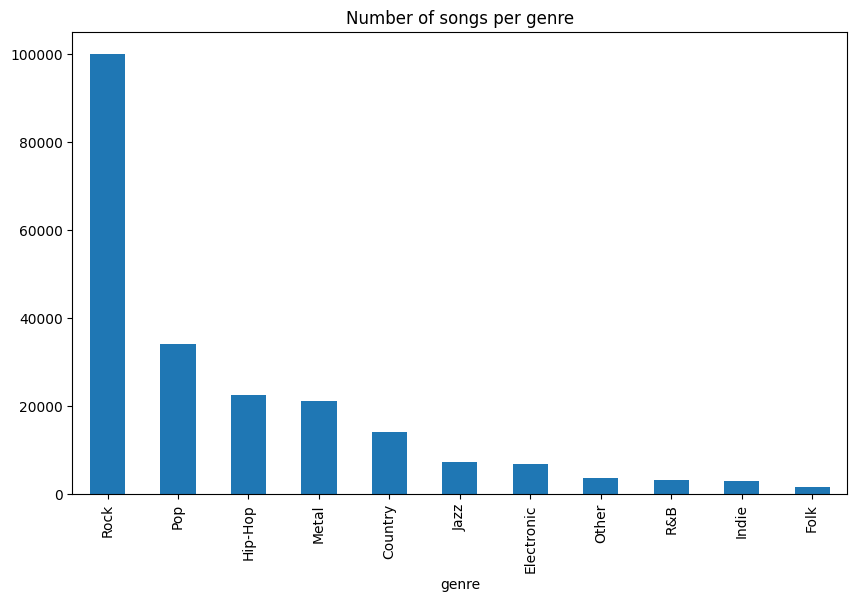

In [38]:
# plot histogram of music genres
df['genre'].value_counts().plot(kind='bar', figsize=(10, 6), title='Number of songs per genre')

In [8]:
df[df['genre'] == 'Pop'].value_counts()

Unnamed: 0  index   song              year  artist           genre  lyrics                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

# Splitting years

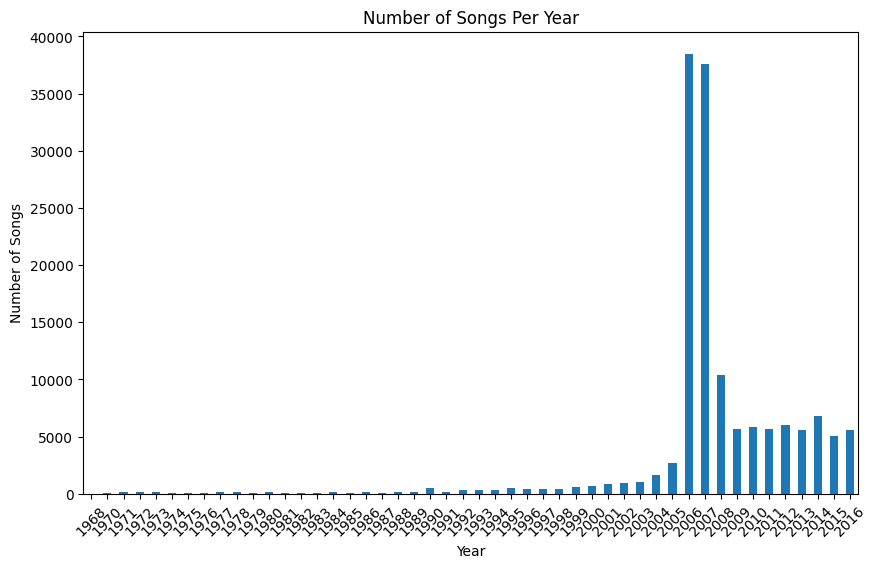

In [63]:
songs_per_year = df.groupby('year').size()

plt.figure(figsize=(10, 6))
songs_per_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.title('Number of Songs Per Year')
plt.xticks(rotation=45)
plt.show()

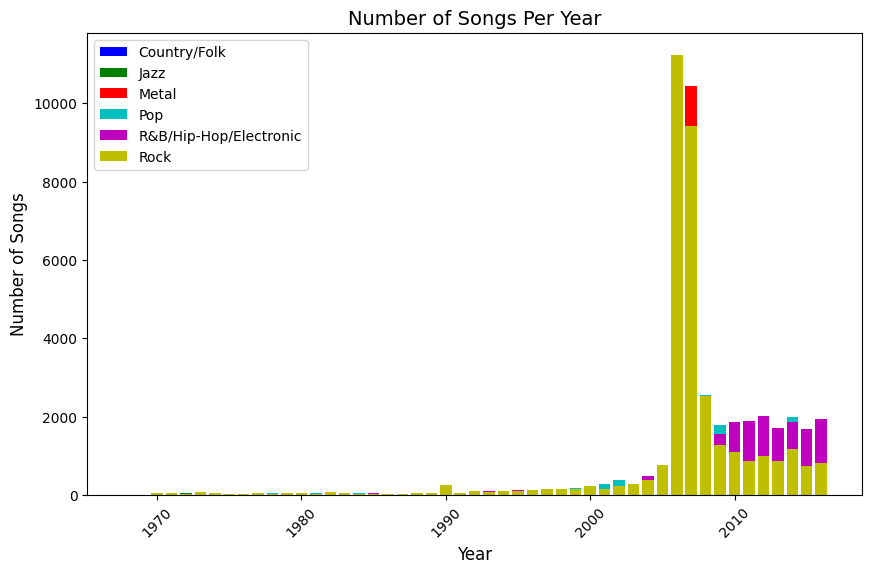

In [64]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

songs_per_year = df.groupby(['year', 'genre']).size().reset_index(name='count')

plt.figure(figsize=(10, 6))

# Define a color palette
genre_colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
color_palette = list(genre_colors.values())[:len(songs_per_year['genre'].unique())]

# Plot the bars with genre colors
for i, (genre, group) in enumerate(songs_per_year.groupby('genre')):
    plt.bar(group['year'], group['count'], color=color_palette[i], label=genre)

plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)
plt.title('Number of Songs Per Year', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [9]:
df1, df2, df3, df4 = pp.split_years(df)

/home/nicolas/Prog/python-projects/NLP/nlp-project/src/preprocessing/preprocessing.py:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=True)


<Axes: title={'center': 'Number of songs per genre in 1960-1979'}, xlabel='genre'>

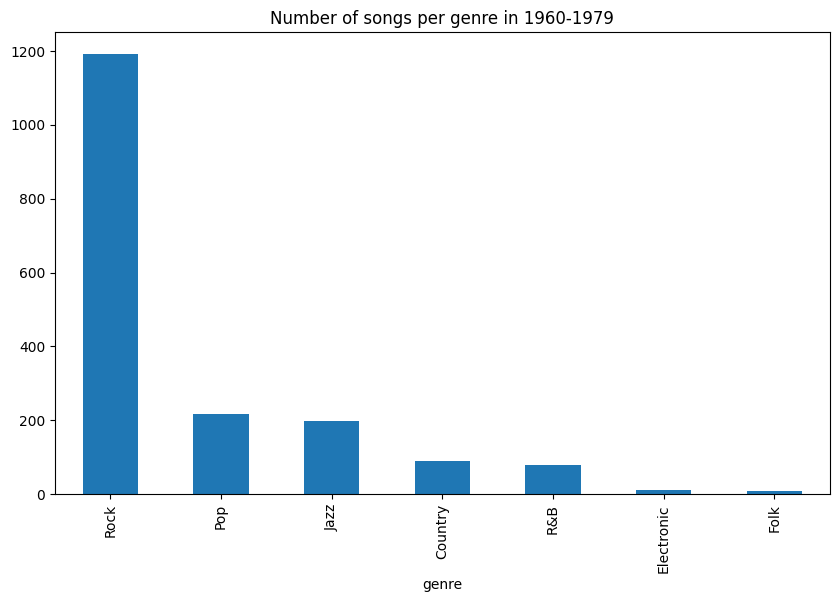

In [14]:
df1['genre'].value_counts().plot(kind='bar', figsize=(10, 6), title='Number of songs per genre in 1968-1980')

<Axes: title={'center': 'Number of songs per genre in 1980-1999'}, xlabel='genre'>

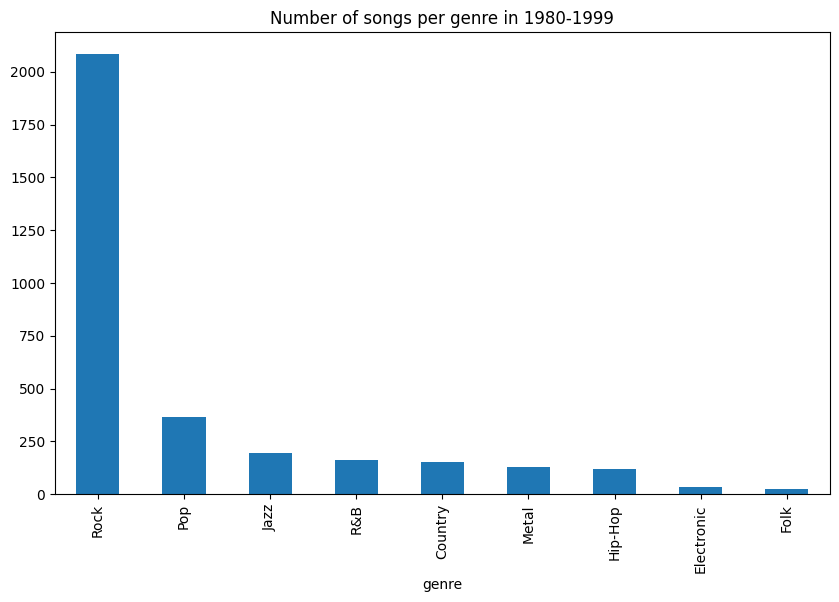

In [15]:
df2['genre'].value_counts().plot(kind='bar', figsize=(10, 6), title='Number of songs per genre in 1980-1992')

<Axes: title={'center': 'Number of songs per genre in 1992-2004'}, xlabel='genre'>

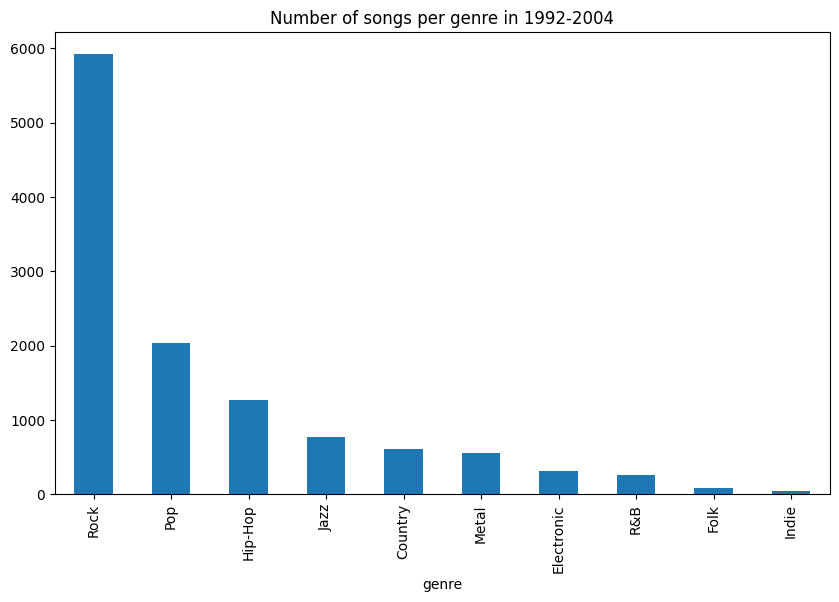

In [19]:
df3['genre'].value_counts().plot(kind='bar', figsize=(10, 6), title='Number of songs per genre in 1992-2004')

<Axes: title={'center': 'Number of songs per genre in 2004-2016'}, xlabel='genre'>

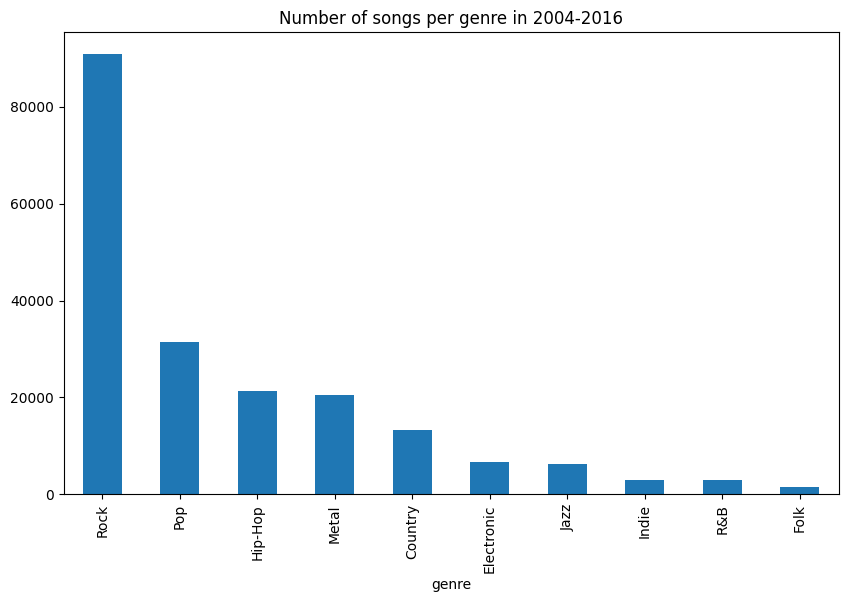

In [20]:
df4['genre'].value_counts().plot(kind='bar', figsize=(10, 6), title='Number of songs per genre in 2004-2016')

# Adjusting genre distribution

In [55]:
def map_genre_to_category(genre):
    if genre in ['Hip-Hop', 'R&B', 'Electronic']:
        return 'R&B/Hip-Hop/Electronic'
    elif genre in ['Country', 'Folk']:
        return 'Country/Folk'
    else:
        return genre

,Unnamed: 0,index,song,year,artist,genre,lyrics,lyrics-nltk
0,0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby know im gonna cut right chase woman ma...,"[oh, baby, know, im, gon, na, cut, right, chas..."
1,1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything easy like seem sure still wa...,"[playin, everything, easy, like, seem, sure, s..."
2,2,2,honesty,2009,beyonce-knowles,Pop,search tenderness isnt hard find love need liv...,"[search, tenderness, isnt, hard, find, love, n..."
3,3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh oh oh oh wrote book stand title book ...,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t..."
4,4,4,black-culture,2009,beyonce-knowles,Pop,party people people party popping sitting arou...,"[party, people, people, party, popping, sittin..."
...,...,...,...,...,...,...,...,...
218205,362232,362232,who-am-i-drinking-tonight,2012,edens-edge,Country/Folk,gotta say boy couple date youre hand outright ...,"[got, ta, say, boy, couple, date, youre, hand,..."
218206,362233,362233,liar,2012,edens-edge,Country/Folk,helped find diamond ring made try everything t...,"[helped, find, diamond, ring, made, try, every..."
218207,362234,362234,last-supper,2012,edens-edge,Country/Folk,look couple corner booth look lot like shes lo...,"[look, couple, corner, booth, look, lot, like,..."
218208,362235,362235,christ-alone-live-in-studio,2012,edens-edge,Country/Folk,fly mortal earth im measured depth girth fathe...,"[fly, mortal, earth, im, measured, depth, girt..."


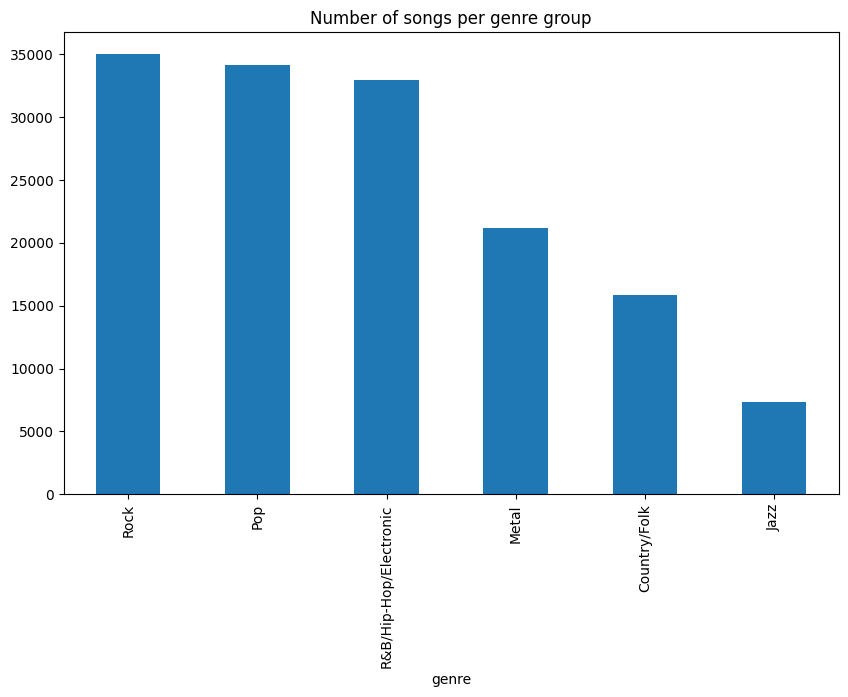

In [56]:
df['genre'] = df['genre'].apply(map_genre_to_category)
df['genre'].value_counts().plot(kind='bar', figsize=(10, 6), title='Number of songs per genre group')
display(df)

35000 35000


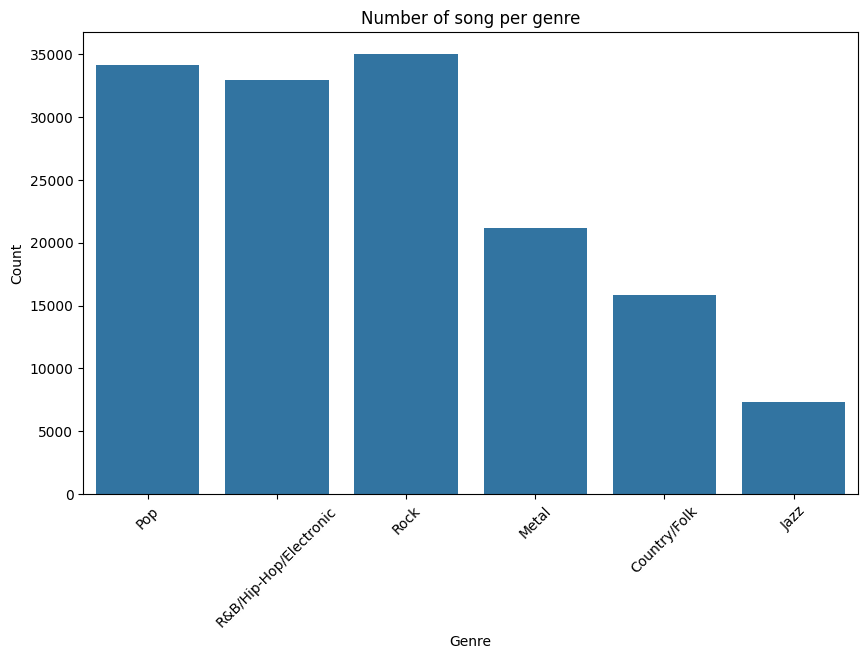

In [57]:
# Too many rocks songs, let's reduce the number of rock songs
df = df[~(df['genre'] == 'Other')]
df = df[~(df['genre'] == 'Indie')]

rocks_indices = df[df['genre'] == 'Rock'].index

num_rocks_to_keep = 35000
num_rocks_current = len(rocks_indices)

print(num_rocks_current, num_rocks_to_keep)

if num_rocks_current > num_rocks_to_keep:
    keep_indices = np.random.choice(rocks_indices, num_rocks_to_keep, replace=False)
else:
    keep_indices = rocks_indices

df = df.drop(index=set(rocks_indices) - set(keep_indices))

plt.figure(figsize=(10, 6))
sns.countplot(x='genre', data=df)

plt.title('Number of song per genre') 
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

# Word statistics

In [58]:
df

,Unnamed: 0,index,song,year,artist,genre,lyrics,lyrics-nltk
0,0,0,ego-remix,2009,beyonce-knowles,Pop,oh baby know im gonna cut right chase woman ma...,"[oh, baby, know, im, gon, na, cut, right, chas..."
1,1,1,then-tell-me,2009,beyonce-knowles,Pop,playin everything easy like seem sure still wa...,"[playin, everything, easy, like, seem, sure, s..."
2,2,2,honesty,2009,beyonce-knowles,Pop,search tenderness isnt hard find love need liv...,"[search, tenderness, isnt, hard, find, love, n..."
3,3,3,you-are-my-rock,2009,beyonce-knowles,Pop,oh oh oh oh oh oh wrote book stand title book ...,"[oh, oh, oh, oh, oh, oh, wrote, book, stand, t..."
4,4,4,black-culture,2009,beyonce-knowles,Pop,party people people party popping sitting arou...,"[party, people, people, party, popping, sittin..."
...,...,...,...,...,...,...,...,...
218205,362232,362232,who-am-i-drinking-tonight,2012,edens-edge,Country/Folk,gotta say boy couple date youre hand outright ...,"[got, ta, say, boy, couple, date, youre, hand,..."
218206,362233,362233,liar,2012,edens-edge,Country/Folk,helped find diamond ring made try everything t...,"[helped, find, diamond, ring, made, try, every..."
218207,362234,362234,last-supper,2012,edens-edge,Country/Folk,look couple corner booth look lot like shes lo...,"[look, couple, corner, booth, look, lot, like,..."
218208,362235,362235,christ-alone-live-in-studio,2012,edens-edge,Country/Folk,fly mortal earth im measured depth girth fathe...,"[fly, mortal, earth, im, measured, depth, girt..."


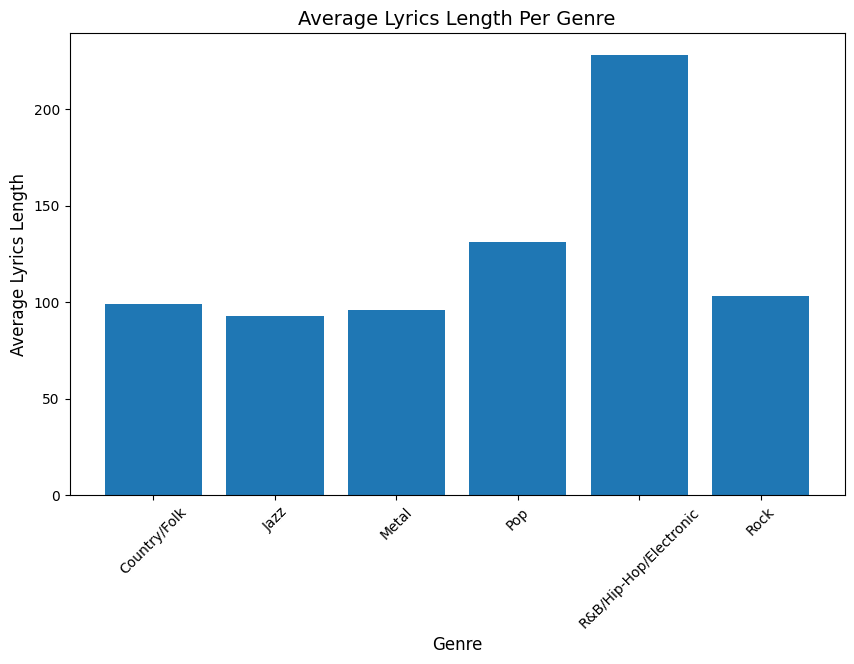

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

df['lyrics_length'] = df['lyrics-nltk'].apply(len)

avg_length_by_genre = df.groupby('genre')['lyrics_length'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_length_by_genre['genre'], avg_length_by_genre['lyrics_length'])
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Lyrics Length', fontsize=12)
plt.title('Average Lyrics Length Per Genre', fontsize=14)
plt.xticks(rotation=45)
plt.show()

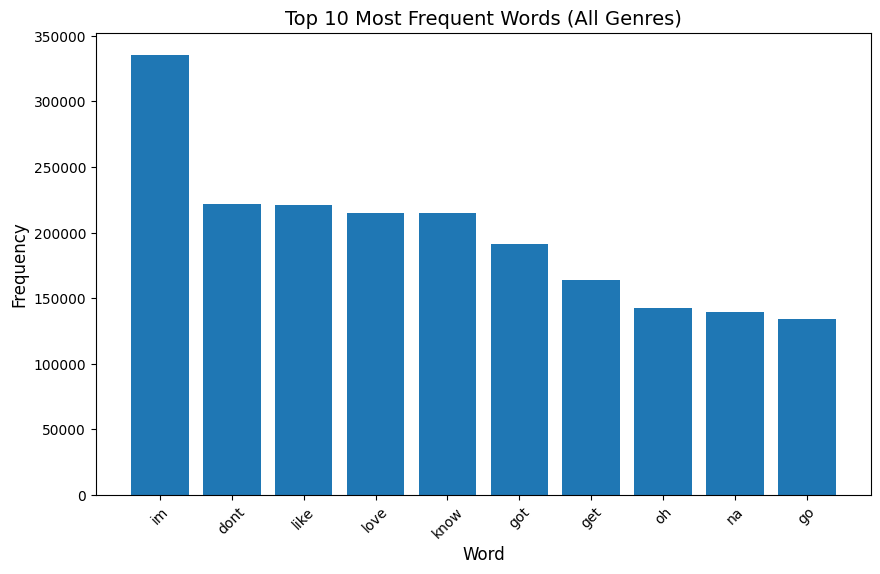

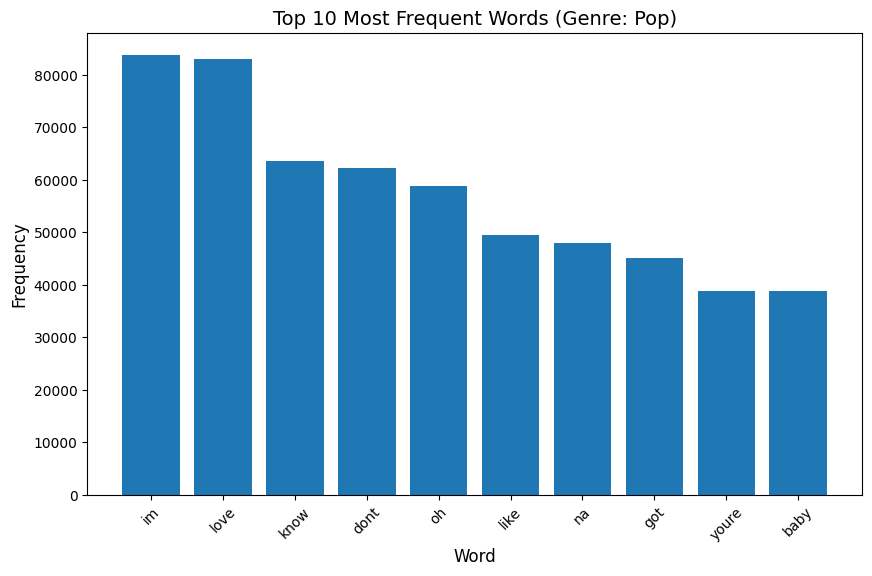

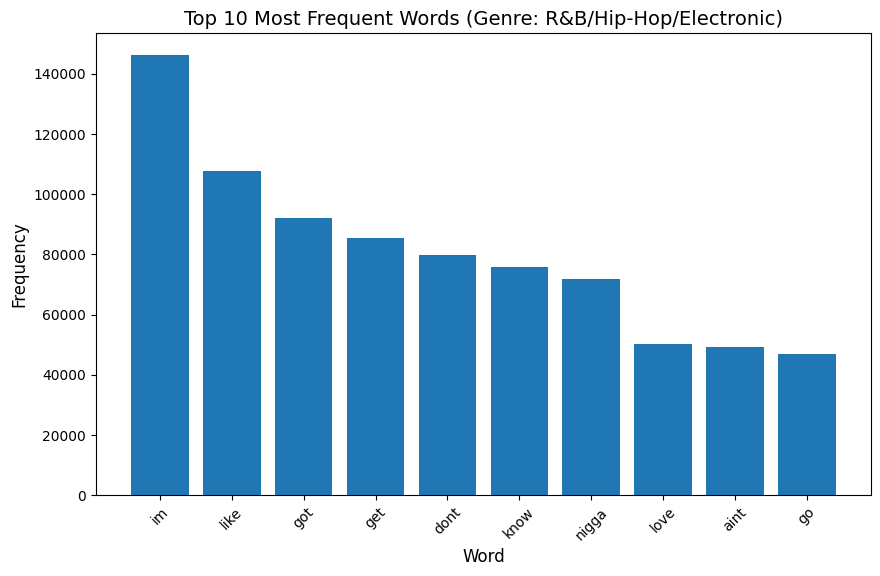

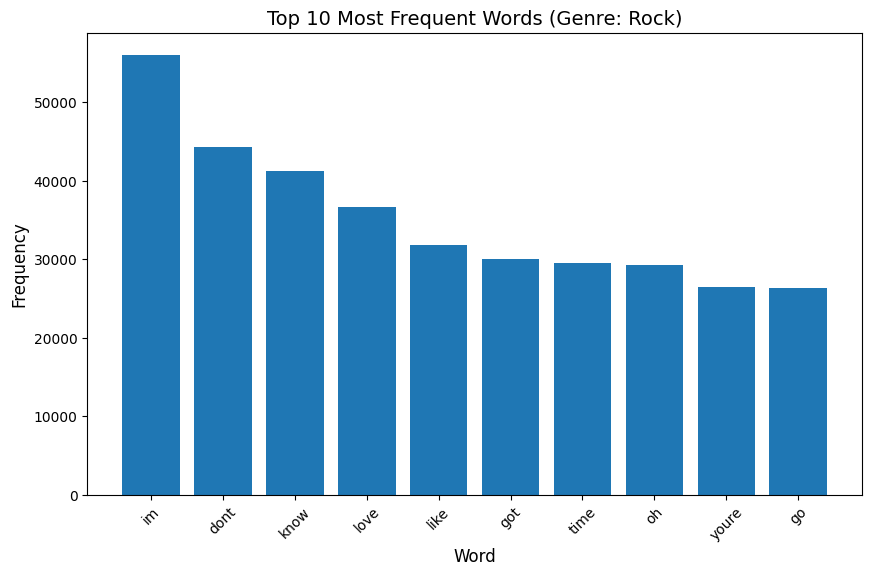

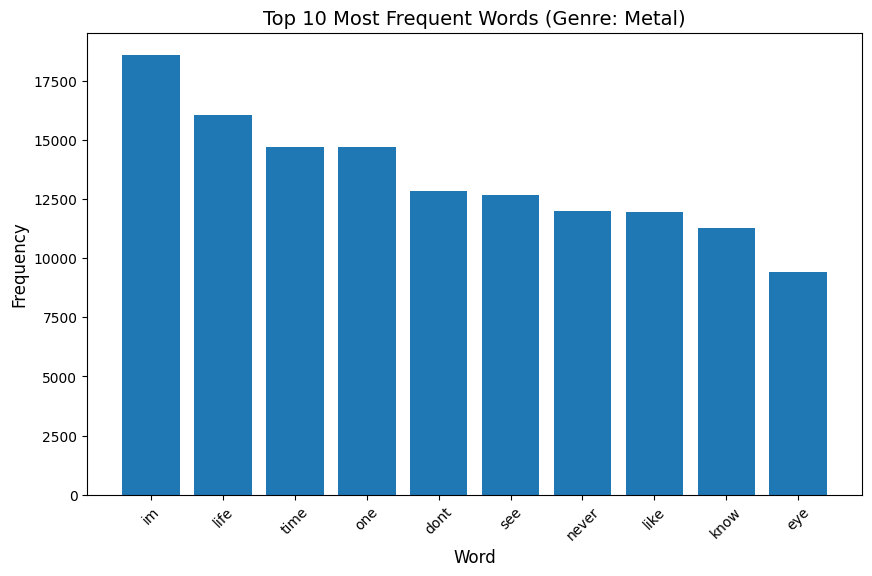

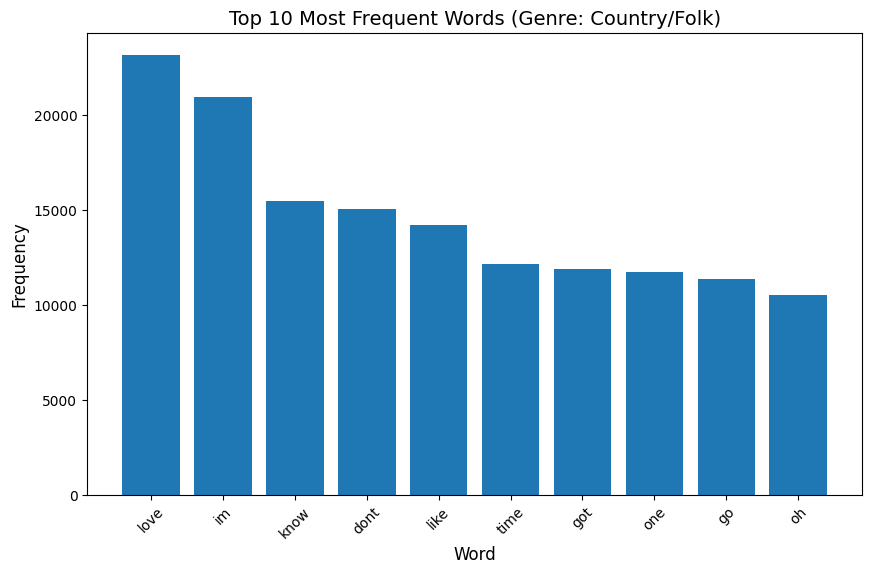

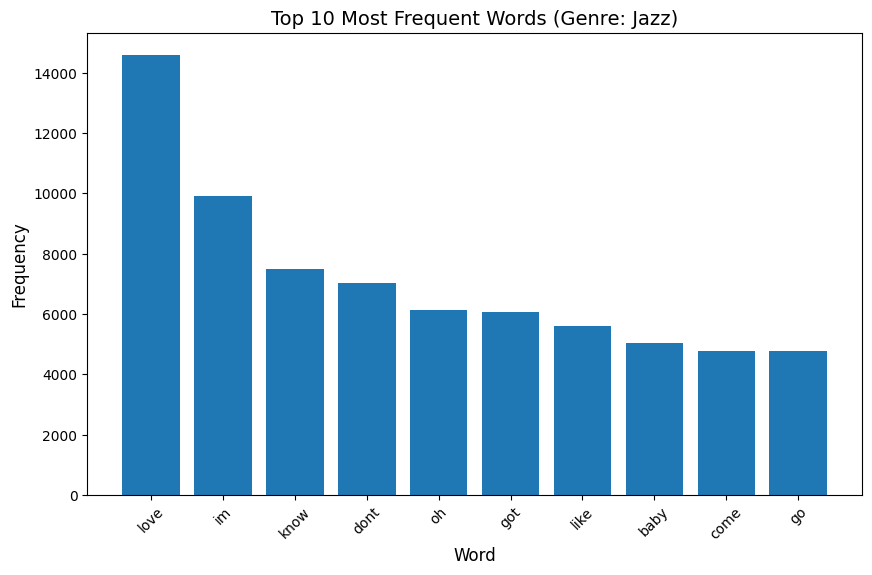

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

all_tokens = [token for lyrics in df['lyrics-nltk'] for token in lyrics]

all_freq = Counter(all_tokens)

top_10_all = all_freq.most_common(10)

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_10_all)), [count for word, count in top_10_all])
plt.xticks(range(len(top_10_all)), [word for word, count in top_10_all], rotation=45)
plt.xlabel('Word', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 10 Most Frequent Words (All Genres)', fontsize=14)
plt.show()

for genre in df['genre'].unique():
    genre_lyrics = df[df['genre'] == genre]['lyrics-nltk']
    genre_tokens = [token for lyrics in genre_lyrics for token in lyrics]
    genre_freq = Counter(genre_tokens)
    top_10_genre = genre_freq.most_common(10)

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(top_10_genre)), [count for word, count in top_10_genre])
    plt.xticks(range(len(top_10_genre)), [word for word, count in top_10_genre], rotation=45)
    plt.xlabel('Word', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Top 10 Most Frequent Words (Genre: {genre})', fontsize=14)
    plt.show()